In [ ]:
import mne
import matplotlib.pyplot as plt

# path to file
edf_path = r"C:\Users\Lenovo\Desktop\HRV-Analysis\DATA\07-52-53_1 hour.EDF"

# Load the raw EDF
raw = mne.io.read_raw_edf(edf_path, preload=True, verbose=False)


In [ ]:
# List channels 
print("Available channels:", raw.ch_names)

Available channels: ['ECG', 'Accelerometer_X', 'Accelerometer_Y', 'Accelerometer_Z', 'Marker']


In [ ]:
# choosing  ECG channel
ecg_chan = "ECG"  
if ecg_chan not in raw.ch_names:
    raise ValueError(f"Channel '{ecg_chan}' not found; available: {raw.ch_names}")

In [17]:
# Extract data and time array
ecg_data, times = raw.get_data(picks=ecg_chan, return_times=True)

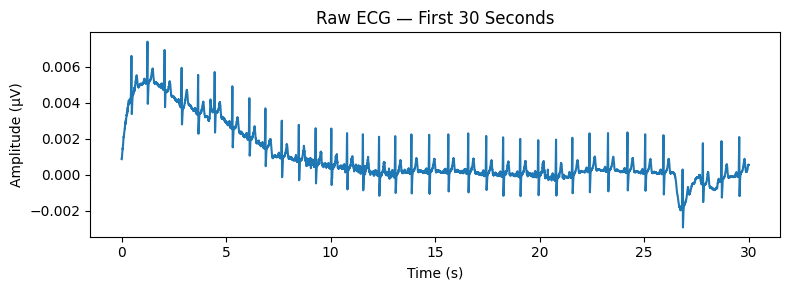

In [ ]:
# Plotting first 30 seconds
sf = raw.info["sfreq"]          # sampling frequency (Hz)
window_sec = 30                 # length of snippet in seconds
n_samples = int(sf * window_sec)

plt.figure(figsize=(8, 3))
plt.plot(times[:n_samples], ecg_data[0, :n_samples])
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (µV)")
plt.title(f"Raw ECG — First {window_sec} Seconds")
plt.tight_layout()
plt.show()


In [ ]:
import neurokit2 as nk

# 1. Cleaning raw ECG signal
ecg_clean = nk.ecg_clean(ecg_data[0], sampling_rate=sf, method="biosppy")

# 2. Detect R-peaks across the whole recording
signals, info = nk.ecg_peaks(ecg_clean, sampling_rate=sf)
rpeaks = info["ECG_R_Peaks"]

# 3. Quickcheck
print(f"Detected {len(rpeaks)} R-peaks")
print("First 10 R-peak sample indices:", rpeaks[:10])


Detected 4139 R-peaks
First 10 R-peak sample indices: [ 467 1234 2054 2868 3658 4450 5297 6109 6876 7660]


SDNN  = 79.90 ms
RMSSD = 45.45 ms
pNN50 = 20.25 %


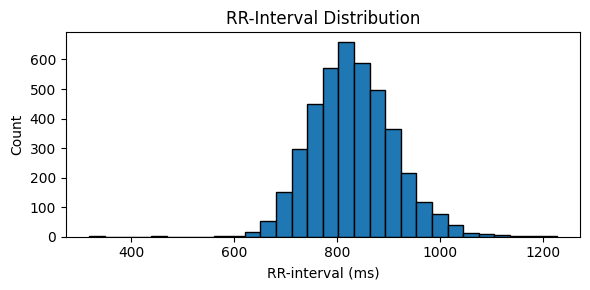

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Compute rr intervals
rr_intervals = np.diff(rpeaks) / sf * 1000

# 2. Compute time domain metrics
sdnn  = np.std(rr_intervals, ddof=1)
rmssd = np.sqrt(np.mean(np.diff(rr_intervals)**2))
pnn50 = np.sum(np.abs(np.diff(rr_intervals)) > 50) / len(rr_intervals) * 100

print(f"SDNN  = {sdnn:.2f} ms")
print(f"RMSSD = {rmssd:.2f} ms")
print(f"pNN50 = {pnn50:.2f} %")

# 3. Plotting hist rr intervals
plt.figure(figsize=(6, 3))
plt.hist(rr_intervals, bins=30, edgecolor='black')
plt.xlabel("RR-interval (ms)")
plt.ylabel("Count")
plt.title("RR-Interval Distribution")
plt.tight_layout()
plt.show()


Frequency‐Domain HRV Analysis

All columns returned:
 ['HRV_ULF', 'HRV_VLF', 'HRV_LF', 'HRV_HF', 'HRV_VHF', 'HRV_TP', 'HRV_LFHF', 'HRV_LFn', 'HRV_HFn', 'HRV_LnHF'] 



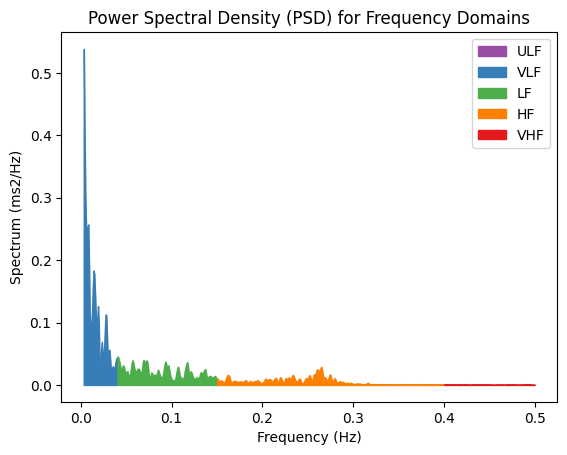

In [ ]:
import neurokit2 as nk

# 1. Compute freq domain metrics with Welch method,

fd = nk.hrv_frequency(
    rpeaks,
    sampling_rate=sf,
    psd_method="welch",
    normalize=True,   
    show=True
)

# print columns
print("All columns returned:\n", fd.columns.tolist(), "\n")